In [132]:
import os
import json
import pandas as pd

In [133]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries

In [134]:
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [135]:
def read_all_json_files(JSON_ROOT):
    for direpath, direnames, filenames in os.walk(JSON_ROOT):
        result = []
        for f in filenames:
            if f.endswith('.json'):
                json_content_2 = read_json(os.path.join(JSON_ROOT,f))
                for i in json_content_2["results"]:
                    result.append(i)
        df = pd.DataFrame(result)
        return df

In [136]:
df_daily_summaries = read_all_json_files('./data/daily_summaries')

In [137]:
# display a summary of df_daily_summaries
df_daily_summaries

,date,datatype,station,attributes,value
0,2018-12-01T00:00:00,PRCP,GHCND:US1DENC0001,",,N,",0
1,2018-12-01T00:00:00,PRCP,GHCND:US1DENC0002,"T,,N,",0
2,2018-12-01T00:00:00,SNOW,GHCND:US1DENC0002,",,N,",0
3,2018-12-01T00:00:00,SNWD,GHCND:US1DENC0002,",,N,",0
4,2018-12-01T00:00:00,WESD,GHCND:US1DENC0002,",,N,",0
...,...,...,...,...,...
1114,2018-12-31T00:00:00,WDF2,GHCND:USW00013781,",,W,",130
1115,2018-12-31T00:00:00,WDF5,GHCND:USW00013781,",,W,",130
1116,2018-12-31T00:00:00,WSF2,GHCND:USW00013781,",,W,",63
1117,2018-12-31T00:00:00,WSF5,GHCND:USW00013781,",,W,",76


How many stations are there in total for FIPS10003

In [138]:
df_daily_summaries['station'].nunique()

17

Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [139]:
temps_max = pd.DataFrame()

In [140]:
temps_max = df_daily_summaries[['date','datatype','value']]

In [141]:
temps_max

,date,datatype,value
0,2018-12-01T00:00:00,PRCP,0
1,2018-12-01T00:00:00,PRCP,0
2,2018-12-01T00:00:00,SNOW,0
3,2018-12-01T00:00:00,SNWD,0
4,2018-12-01T00:00:00,WESD,0
...,...,...,...
1114,2018-12-31T00:00:00,WDF2,130
1115,2018-12-31T00:00:00,WDF5,130
1116,2018-12-31T00:00:00,WSF2,63
1117,2018-12-31T00:00:00,WSF5,76


In [142]:
temps_max2 = temps_max[temps_max.datatype.str.match('TMAX')]

In [143]:
temps_max2

,date,datatype,value
24,2018-12-01T00:00:00,TMAX,78
56,2018-12-02T00:00:00,TMAX,144
90,2018-12-03T00:00:00,TMAX,139
128,2018-12-04T00:00:00,TMAX,67
167,2018-12-05T00:00:00,TMAX,17
208,2018-12-06T00:00:00,TMAX,50
247,2018-12-07T00:00:00,TMAX,50
285,2018-12-08T00:00:00,TMAX,39
324,2018-12-09T00:00:00,TMAX,17
361,2018-12-10T00:00:00,TMAX,44


In [144]:
temps_max2.drop('datatype', axis = 1, inplace = True)

In [145]:
temps_max = temps_max2
temps_max

,date,value
24,2018-12-01T00:00:00,78
56,2018-12-02T00:00:00,144
90,2018-12-03T00:00:00,139
128,2018-12-04T00:00:00,67
167,2018-12-05T00:00:00,17
208,2018-12-06T00:00:00,50
247,2018-12-07T00:00:00,50
285,2018-12-08T00:00:00,39
324,2018-12-09T00:00:00,17
361,2018-12-10T00:00:00,44


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [146]:
temps_max.shape

(31, 2)

Let's graph this DataFrame so we can get a visual representation for this information.

In [147]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [148]:
%matplotlib inline

In [149]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 0, 'day of month'),
 Text(0.5, 1.0, 'Max Temperatues Dec 2018')]

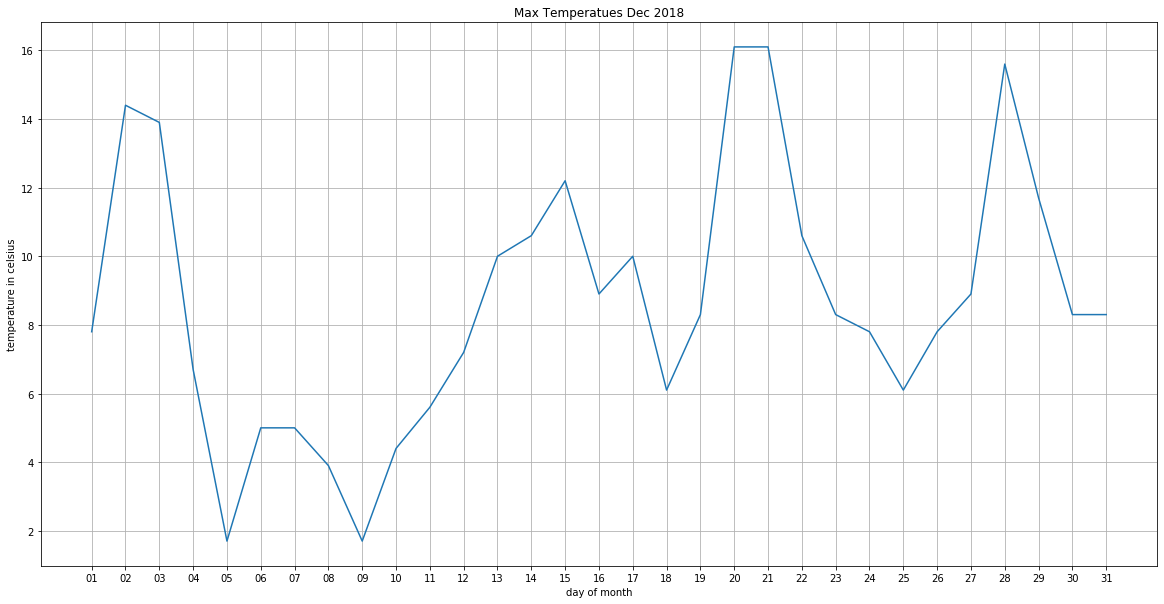

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Dec 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [151]:
temps_min = df_daily_summaries[['date','datatype','value']]

In [152]:
temps_min2 = temps_min[temps_min.datatype.str.match('TMIN')]

In [153]:
temps_min2.drop('datatype', axis = 1, inplace = True)

In [154]:
temps_min = temps_min2
temps_min

,date,value
25,2018-12-01T00:00:00,-16
57,2018-12-02T00:00:00,67
91,2018-12-03T00:00:00,61
129,2018-12-04T00:00:00,-32
168,2018-12-05T00:00:00,-55
209,2018-12-06T00:00:00,-38
248,2018-12-07T00:00:00,-43
286,2018-12-08T00:00:00,-71
325,2018-12-09T00:00:00,-32
362,2018-12-10T00:00:00,-60


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [155]:
temps_min.shape

(31, 2)

Graph the temps_min DataFrame

In [156]:
i = temps_min['date'].str[8:10]
j = temps_min['value'] / 10

[Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 0, 'day of month'),
 Text(0.5, 1.0, 'Min Temperatues Dec 2018')]

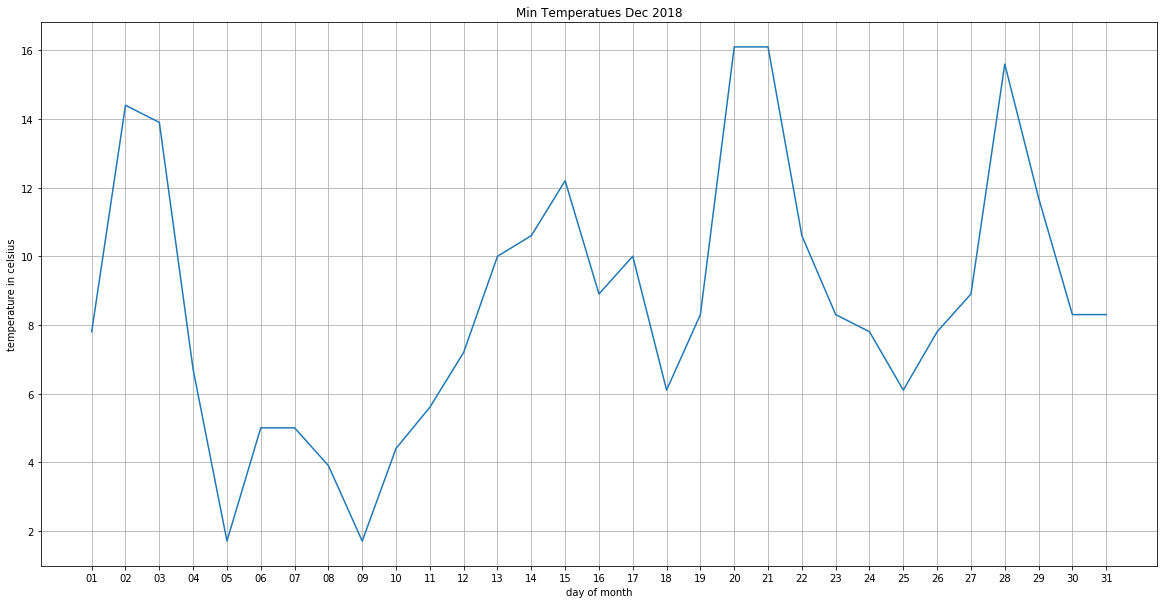

In [157]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min Temperatues Dec 2018')

We can also plot both of these lines in the same graph.

[Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 0, 'day of month'),
 Text(0.5, 1.0, 'Min & Max Temperatues Jan 2018')]

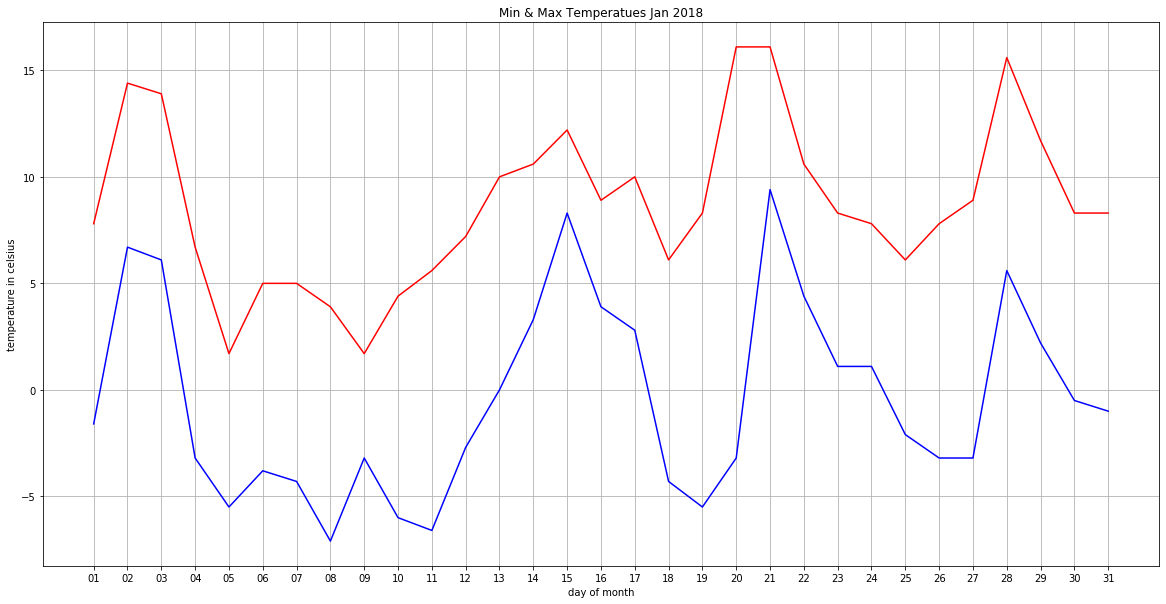

In [158]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')